In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

import pandas as pd
import numpy
import os
import tensorflow as tf

# seed 값 설정
numpy.random.seed(3)
tf.random.set_seed(3)

df_pre = pd.read_csv('../dataset/wine.csv', header=None)
df = df_pre.sample(frac=0.15)

dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)

Epoch 1/3500
2/2 [==============================] - 0s 65ms/step - loss: 2.0482 - accuracy: 0.7259 - val_loss: 1.3696 - val_accuracy: 0.7547
Epoch 2/3500
2/2 [==============================] - 0s 6ms/step - loss: 1.5577 - accuracy: 0.7259 - val_loss: 0.9768 - val_accuracy: 0.7547
Epoch 3/3500
2/2 [==============================] - 0s 7ms/step - loss: 1.0864 - accuracy: 0.7259 - val_loss: 0.6556 - val_accuracy: 0.7547
Epoch 4/3500
2/2 [==============================] - 0s 7ms/step - loss: 0.7075 - accuracy: 0.7243 - val_loss: 0.7205 - val_accuracy: 0.6429
Epoch 5/3500
2/2 [==============================] - 0s 6ms/step - loss: 0.7634 - accuracy: 0.5865 - val_loss: 0.8499 - val_accuracy: 0.4472
Epoch 6/3500
2/2 [==============================] - 0s 7ms/step - loss: 0.7918 - accuracy: 0.5268 - val_loss: 0.5612 - val_accuracy: 0.7236
Epoch 7/3500
2/2 [==============================] - 0s 7ms/step - loss: 0.5716 - accuracy: 0.7136 - val_loss: 0.4968 - val_accuracy: 0.7516
Epoch 8/3500
2/2 [=

In [ ]:
# 학습 자동 중단 설정

In [2]:

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=500, verbose=0, 
          callbacks=[early_stopping_callback,checkpointer])



Epoch 00001: val_loss improved from inf to 0.13985, saving model to ./model\01-0.1399.hdf5

Epoch 00002: val_loss did not improve from 0.13985

Epoch 00003: val_loss improved from 0.13985 to 0.13283, saving model to ./model\03-0.1328.hdf5

Epoch 00004: val_loss improved from 0.13283 to 0.12630, saving model to ./model\04-0.1263.hdf5

Epoch 00005: val_loss did not improve from 0.12630

Epoch 00006: val_loss improved from 0.12630 to 0.12533, saving model to ./model\06-0.1253.hdf5

Epoch 00007: val_loss improved from 0.12533 to 0.11040, saving model to ./model\07-0.1104.hdf5

Epoch 00008: val_loss improved from 0.11040 to 0.10986, saving model to ./model\08-0.1099.hdf5

Epoch 00009: val_loss did not improve from 0.10986

Epoch 00010: val_loss did not improve from 0.10986

Epoch 00011: val_loss did not improve from 0.10986

Epoch 00012: val_loss did not improve from 0.10986

Epoch 00013: val_loss did not improve from 0.10986

Epoch 00014: val_loss did not improve from 0.10986

Epoch 00015

In [3]:
print("\n Accuracy: %.4f" % (model.evaluate(X,Y)[1]))

31/31 [==============================] - 0s 549us/step - loss: 0.0353 - accuracy: 0.9938

 Accuracy: 0.9938


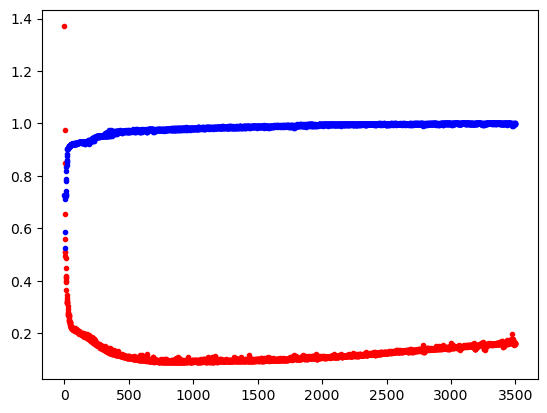

In [5]:
import matplotlib.pyplot as plt

y_vloss=history.history['val_loss']
y_acc=history.history['accuracy']

x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()